In [3]:
import os
import pandas as pd

from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

os.environ["NIXTLA_ID_AS_COL"] = "1"

In [7]:
df = pd.read_csv(
    "https://datasets-nixtla.s3.amazonaws.com/air-passengers.csv",
    parse_dates = ["ds"]
)
df.tail()

,unique_id,ds,y
139,AirPassengers,1960-08-01,606
140,AirPassengers,1960-09-01,508
141,AirPassengers,1960-10-01,461
142,AirPassengers,1960-11-01,390
143,AirPassengers,1960-12-01,432


In [4]:
sf = StatsForecast(
    models = [AutoARIMA(season_length = 12)],
    freq = "M",
)
sf.fit(df)

StatsForecast(models=[AutoARIMA])

In [11]:
forecast_df = sf.predict(h = 12, level = [50, 90])
forecast_df

,unique_id,ds,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-lo-50,AutoARIMA-hi-50,AutoARIMA-hi-90
0,AirPassengers,1960-12-31,444.300049,424.971436,436.374146,452.225952,463.628693
1,AirPassengers,1961-01-31,418.210022,394.616974,408.535431,427.884583,441.803070
2,AirPassengers,1961-02-28,446.237030,418.134003,434.713074,457.760986,474.340057
3,AirPassengers,1961-03-31,488.228943,456.491608,475.214691,501.243164,519.966248
4,AirPassengers,1961-04-30,499.231354,464.168854,484.853607,513.609131,534.293884
5,AirPassengers,1961-05-31,562.230652,524.150452,546.615417,577.845825,600.310852
6,AirPassengers,1961-06-30,649.230835,608.349976,632.467224,665.994507,690.111694
7,AirPassengers,1961-07-31,633.230774,589.730652,615.393066,651.068481,676.730896
8,AirPassengers,1961-08-31,535.230774,489.260010,516.380005,554.081604,581.201599
9,AirPassengers,1961-09-30,488.230804,439.915619,468.418640,508.042969,536.545959


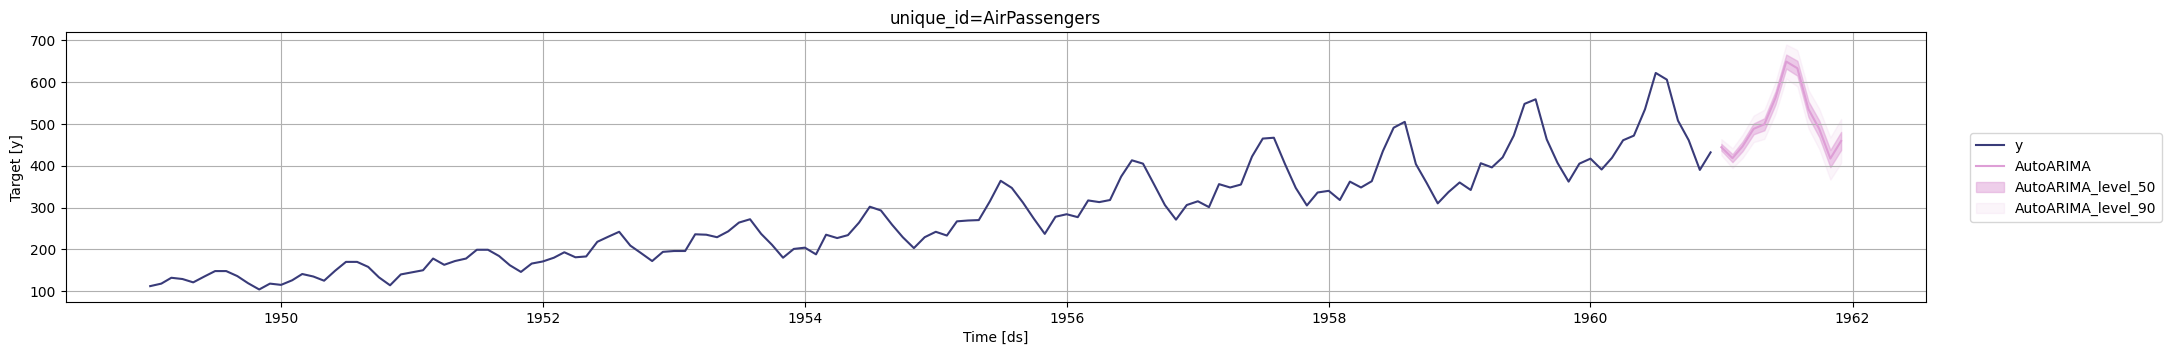

In [14]:
sf.plot(df, forecast_df, level = [50, 90])